HUANG He/LI M2/22107447

M2 project : Convolutions and character embeddings
======================

The project aims to predict the language from which a character sequence comes from. This is done with surnames and it involves a dozen of languages.

Data download & description
---------------------

In [ ]:
from urllib.request import urlretrieve

urlretrieve('http://www.linguist.univ-paris-diderot.fr/~bcrabbe/datasets/name2lang.train','name2lang.train')
urlretrieve('http://www.linguist.univ-paris-diderot.fr/~bcrabbe/datasets/name2lang.valid','name2lang.valid')

#Prints the beginning of the valid set
istream = open('name2lang.valid')
for idx, line in enumerate(istream):
  print(line.strip())
  if idx >=20:
    break
istream.close()

Barros, Portuguese
Campos, Portuguese
D'cruz, Portuguese
Henriques, Portuguese
Machado, Portuguese
Silva, Portuguese
Torres, Portuguese
Ahearn, Irish
Aonghus, Irish
Brady, Irish
Cearbhall, Irish
Flann, Irish
Kavanagh, Irish
Maguire, Irish
Mcmahon, Irish
Mcneil, Irish
Monahan, Irish
Muirchertach, Irish
Mullen, Irish
O'Connell, Irish
O'Grady, Irish


First exercise : data preprocessing (3pts)
---
The first exercise amounts to create encodings from integers to strings and from strings to integers.

In [ ]:
def vocabulary(filename,char_vocab,pad_token='<pad>'):
    """
    Args:
      filename (str)    : the name of the file
      char_vocab (bool) : selects if we extact char symbols or language codes
      pad_token(str)    : the value of the pad symbol
    """
    #char_vocab is a boolean flag that tells if we extract char symbols or language codes

    idx2sym = {}
    sym2idx = {}
    char = []
    lang = []

    with open(filename,'r',encoding = 'utf-8')as f:
        for line in f.readlines():
            l = line.strip().replace(" ", "").split(',')[1]
            if l not in lang:
                lang.append(l)

            char_list = list(line.strip().split(',')[0])
            for ch in char_list:
                if ch not in char:
                    char.append(ch)
        if char_vocab:
            for i in range(len(char)):
                idx2sym[i] = char[i]
                sym2idx[char[i]] = i
            idx2sym[len(char)] = pad_token
            sym2idx[pad_token] = len(char)
        else:
          lang = sorted(lang)
          for i in range(len(lang)):
              idx2sym[i] = lang[i]
              sym2idx[lang[i]] = i
    #TODO : return the two encoding maps idx2sym and sym2idx as a couple
    return[idx2sym,sym2idx]

In [ ]:
c = vocabulary('name2lang.train',True)
print(c[0],c[1])

{0: 'A', 1: 'b', 2: 'r', 3: 'e', 4: 'u', 5: 'l', 6: 'q', 7: 'm', 8: 'i', 9: 'd', 10: 'a', 11: 'v', 12: 's', 13: 'j', 14: 'o', 15: 'B', 16: 't', 17: 'C', 18: 'z', 19: 'h', 20: 'p', 21: 'D', 22: "'", 23: 'c', 24: 'g', 25: ' ', 26: 'n', 27: 'E', 28: 'F', 29: 'G', 30: 'L', 31: 'M', 32: 'N', 33: 'P', 34: 'R', 35: 'S', 36: 'f', 37: 'V', 38: 'y', 39: 'k', 40: 'H', 41: 'I', 42: 'J', 43: 'K', 44: 'O', 45: 'w', 46: 'T', 47: 'Q', 48: 'W', 49: 'x', 50: 'U', 51: 'Y', 52: 'Z', 53: 'X', 54: '<pad>'} {'A': 0, 'b': 1, 'r': 2, 'e': 3, 'u': 4, 'l': 5, 'q': 6, 'm': 7, 'i': 8, 'd': 9, 'a': 10, 'v': 11, 's': 12, 'j': 13, 'o': 14, 'B': 15, 't': 16, 'C': 17, 'z': 18, 'h': 19, 'p': 20, 'D': 21, "'": 22, 'c': 23, 'g': 24, ' ': 25, 'n': 26, 'E': 27, 'F': 28, 'G': 29, 'L': 30, 'M': 31, 'N': 32, 'P': 33, 'R': 34, 'S': 35, 'f': 36, 'V': 37, 'y': 38, 'k': 39, 'H': 40, 'I': 41, 'J': 42, 'K': 43, 'O': 44, 'w': 45, 'T': 46, 'Q': 47, 'W': 48, 'x': 49, 'U': 50, 'Y': 51, 'Z': 52, 'X': 53, '<pad>': 54}


In [ ]:
l = vocabulary('name2lang.train',False)
print(l[0],l[1])

{0: 'Arabic', 1: 'Chinese', 2: 'Czech', 3: 'Dutch', 4: 'English', 5: 'French', 6: 'German', 7: 'Greek', 8: 'Irish', 9: 'Italian', 10: 'Japanese', 11: 'Korean', 12: 'Polish', 13: 'Portuguese', 14: 'Russian', 15: 'Scottish', 16: 'Spanish', 17: 'Vietnamese'} {'Arabic': 0, 'Chinese': 1, 'Czech': 2, 'Dutch': 3, 'English': 4, 'French': 5, 'German': 6, 'Greek': 7, 'Irish': 8, 'Italian': 9, 'Japanese': 10, 'Korean': 11, 'Polish': 12, 'Portuguese': 13, 'Russian': 14, 'Scottish': 15, 'Spanish': 16, 'Vietnamese': 17}


In [ ]:
def pad_sequence(sequence,pad_size,pad_token):

    #returns a list with additional pad tokens to match pad_size if needed

    #TODO
    if len(sequence) == pad_size:
      return sequence
    else:
      return sequence + [pad_token] * (pad_size - len(sequence))
    #TODO

def code_sequence(charseq,encodingmap):
  #we ignore chars not seen in train set
  #charseq is a sequence of chars
  return [encodingmap[c] for c in charseq if c in encodingmap]

def decode_sequence(idxseq,decodingmap):
  #idxseq is a list of integers
  return [decodingmap[idx] for idx in idxseq]

In [ ]:
code_sequence(['B', 'a', 'r', 'r', 'o', 's'], c[1])

[15, 10, 2, 2, 14, 12]

Second exercise : data generator (2pt)
------------

The data generator aims to deliver efficiently well formed batches of data to the model.

In [ ]:
def read_dataset(filename,input_symbols):
    #reads from a raw datafile, either the surnmaes if input_symbols is True otherwise it reads the language
    symbols = []
    istream = open(filename)
    for line in istream:
      if line and not line.isspace():
        word,lang = line.split(',')
        symbol = list(word.strip()) if input_symbols else lang.strip()
        symbols.append(symbol)
    istream.close()
    return symbols

In [ ]:
c_list = read_dataset('name2lang.train',True)

In [ ]:
l_list = read_dataset('name2lang.train',False)
print(len(l_list))

16144


In [ ]:
from random import shuffle

class DataGenerator:

      def __init__(self,filename, parentgenerator = None,pad_token='<pad>'):

           self.pad_token = pad_token
           if parentgenerator is not None: #Reuse the encodings of the parent if specified
             self.input_idx2sym,self.input_sym2idx     = parentgenerator.input_idx2sym,parentgenerator.input_sym2idx
             self.output_idx2sym,self.output_sym2idx   = parentgenerator.output_idx2sym,parentgenerator.output_sym2idx
           else:
             #######################################

             char = vocabulary(filename,True)
             lang = vocabulary(filename,False)

             self.input_idx2sym,self.input_sym2idx     =  char[0], char[1] # characters to index and index to characters
             self.output_idx2sym,self.output_sym2idx   =  lang[0], lang[1] # languages to index and index to languages
             ####################################
           self.X = read_dataset(filename,True) # read_dataset('name2lang.train',True)
           self.Y = read_dataset(filename,False) # read_dataset('name2lang.train',False)

      def generate_batches(self,batch_size):
              assert(len(self.X) == len(self.Y))

              N     = len(self.X)
              idxes = list(range(N))

              #Data ordering (try to explain why these 2 lines make sense...)
              shuffle(idxes)
              idxes.sort(key=lambda idx: len(self.X[idx]))

              #batch generation
              bstart = 0
              while bstart < N:
                 bend        = min(bstart+batch_size,N)
                 batch_idxes = idxes[bstart:bend]
                 batch_len   = max(len(self.X[idx]) for idx in batch_idxes)
                 Xpad        = [pad_sequence(self.X[idx],batch_len,self.pad_token)  for idx in batch_idxes]
                 seqX        = [code_sequence(x,self.input_sym2idx) for x in Xpad]
                 seqY        = [self.output_sym2idx[self.Y[idx]] for idx in batch_idxes]

                 assert(len(seqX) == len(seqY))
                 yield (seqX,seqY)
                 bstart += batch_size


In [ ]:
# Test bloc
dg = DataGenerator('name2lang.train')
sample = dg.generate_batches(5)
print(next(sample))

([[46, 14], [51, 8], [37, 14], [29, 4], [43, 14]], [17, 11, 17, 11, 11])


Third exercise : Implement the word embedding submodule (5pts)
-----
This exercise amounts to implement a pytorch submodule that takes as input a sequence of char indexes and outputs the word embedding corresponding for the sequence.

The module contains no training method and is meant to be used in a larger network. Its use is quite similar to `nn.Embedding`




In [ ]:
import torch
import torch.nn as nn

class CharConvolution(nn.Module):

      def __init__(self,windowK,chars_vocab_size,input_embedding_size,output_embedding_size,padding_idx = None):

          super(CharConvolution, self).__init__()
          #####################################
          #Initialize and allocate an embeddings class and the Conv1d class
          # CharConvolution(2,55,32,512)
          self.windowK = windowK
          self.M = 2 * self.windowK + 1
          # Embedding(55,32)
          self.embeddings = nn.Embedding(chars_vocab_size,
                                        input_embedding_size,
                                        padding_idx = padding_idx)
          # Conv1d(32,512,5,padding=2)
          self.convlayer = nn.Conv1d(input_embedding_size,
                                     output_embedding_size,
                                     self.M,
                                     padding=windowK)
          #####################################
      def forward(self,xinput):
          #####################################
          #Implement the forward method, taking an input of the form [batch,seq]
          #and return the max pooled result
          embed = self.embeddings(xinput) # [batch,seq,embedding_size]
          embed = embed.transpose(2,1) # [batch,embedding_size,seq]
          pool = nn.MaxPool1d(embed.shape[-1]) # MaxPool1d(seq)
          conv = self.convlayer(embed)
          return pool(conv).squeeze() # [batch,embedding_size]
          ######################################

Fourth Exercise : predict the target language (10pts)
-------
In this exercise, we aim to predict the target language from a word char embedding. You will implement for the `LanguageIdentifier` class:
* A forward function: the function takes as input a char index tensor and returns a vector of prediction for each word
* A train function: the function trains the model on the full dataset (with early stopping)
* A predict function: the function takes a test corpus (a list of words)
and predicts the language. The function outputs its results in textual form. Each word is printed on the same line as its predicted class.

Once implemented you are expected to search for hyperparameters in the main program.






In [ ]:
from matplotlib.pyplot import np
import torch.optim as optim

class LanguageIdentifier(nn.Module):

    def __init__(self,datagenerator,window_size,char_embedding_size,word_embedding_size):
      super(LanguageIdentifier, self).__init__()
      # invocab_size = 55
      invocab_size   = len(datagenerator.input_idx2sym)
      # outvocab_size = 18
      outvocab_size  = len(datagenerator.output_idx2sym)
      # pad_idx        = 54
      pad_idx        = datagenerator.input_sym2idx[datagenerator.pad_token]
      self.charE     = CharConvolution(window_size,invocab_size,char_embedding_size,word_embedding_size,padding_idx = pad_idx)
      # windowK = 2
      # char_embedding_size = 32
      # word_embedding_size = 512
      # CharConvolution(2,55,32,512,54)
      # Linear(512,18)
      self.output    = nn.Linear(word_embedding_size,outvocab_size)

      # store the training and validation loss
      self.train_losses = []
      self.valid_losses = []
      self.valid_acc = 0

    def load(self,filename):
        self.load_state_dict(torch.load(filename))


    def forward(self,xinput):
      #########################
      #takes as input a tensor of the form [batch,seq]
      #and returns a vector of predictions for the language
      char_embed = self.charE(xinput) # [batch,embedding_size]
      output = self.output(char_embed) # [batch,outvocab_size]
      return output
      # pass   # <= TODO
      #########################

    def train(self,traingenerator,validgenerator,epochs,batch_size,device='cpu',learning_rate=0.001):

      self.minloss = 10000000 #the minimal validation loss found so far for an epoch
      ###########################
      #TODO Implement the training function, save the model with minimum loss

      batch_loss = []
      train_acc = []
      batch_sizes = []

      optimizer = torch.optim.Adam(self.parameters(),lr=0.001,betas=(0.9,0.99))
      device = torch.device(device)
      loss_fnc = nn.CrossEntropyLoss()

      for i in range(epochs):

          for (seqX,seqY) in traingenerator.generate_batches(batch_size):
              optimizer.zero_grad() # zero the gradient
              X    = torch.LongTensor(seqX).to(device)
              # X.shape = [batch,seq] e.g.torch.Size([128,3])
              Y    = torch.LongTensor(seqY).to(device)
              # Y.shape = [batch]
              Yhat = self.forward(X)
              # Yhat.shape = [batch,18]
              loss = loss_fnc(Yhat,Y)
              Ypred = torch.argmax(Yhat,dim=1)
              acc = float(torch.sum(Ypred==Y))
              train_acc.append(acc)
              batch_sizes.append(len(Y))

              loss.to(device)
              loss.backward() # do the backward pass
              batch_loss.append(loss.item())
              optimizer.step() # update the weights
          avg_train_loss = sum(batch_loss)/len(batch_loss)
          print('[train]  mean loss = %f, mean acc = %f' % (avg_train_loss,sum(train_acc)/sum(batch_sizes)))
          self.train_losses.append(avg_train_loss)
          self.validate(validgenerator,batch_size,save_min_model=True)

          # pass
          ###########################

    def predict(self,datagenerator,batch_size,device):
        ##########################
        #TODO implement a prediction function that returns the class with highest score for each word in the batch
        predictions = []
        labels = []
        full_names   = []
        device = torch.device(device)

        for (seqX,seqY) in datagenerator.generate_batches(batch_size):
             X    = torch.LongTensor(seqX).to(device)
             Y    = torch.LongTensor(seqY).to(device)
             #print(X.shape) # tensor [128, 3] [128,4]...
             #print(Y.shape) # tensor [128]

             Yhat = self.forward(X)
             #print(Yhat.shape) # tensor [128,18]
             Ypred = torch.argmax(Yhat,dim=1)
             #print(Ypred.shape) # tensor [128]

             for i in range(len(Y)):
                   predictions.append(datagenerator.output_idx2sym[Ypred[i].item()])
                   labels.append(datagenerator.output_idx2sym[Y[i].item()])


             # retrives the index of each character in X and join them into a string
             for i in range(X.shape[0]):
                   join_ch =[datagenerator.input_idx2sym[X[i][j].item()] for j in range(X.shape[1])]
                   # print(join_ch) # ['M', 'u', 'z', 'r', 'u', 'k', 'o', 'v']

                   # in case of <pad>
                   pad_char = "<pad>"
                   if pad_char in join_ch:
                        index = join_ch.index(pad_char)
                        if index !=-1:
                          join_ch = "".join(join_ch[:index])
                   else:
                        join_ch = "".join(join_ch)
                   full_names.append(join_ch)
        print(full_names) # ['Ba', 'Ba', 'Le', 'Ly', 'Ki',...]
        print(predictions)
        print(labels)
        # write the predictions to a file
        with open("predictions.txt","w", encoding="utf-8") as f:
             for i in range(len(predictions)):
                 f.write("name: " + " " +full_names[i] + " " +  " prediction: " + predictions[i] + " " + " label: " + labels[i] + "\n")
        # pass
        ##########################

    def validate(self,datagenerator,batch_size,device='cpu',save_min_model=False):
        #This function cannot be modified

        batch_accurracies = []
        batch_losses      = []
        batch_sizes       = []

        device    = torch.device(device)
        loss_fnc  = nn.CrossEntropyLoss()

        for (seqX,seqY) in datagenerator.generate_batches(batch_size):

              with torch.no_grad():
                  X    = torch.LongTensor(seqX).to(device)
                  Y    = torch.LongTensor(seqY).to(device)

                  Yhat = self.forward(X)
                  loss = loss_fnc(Yhat,Y)
                  Ypred = torch.argmax(Yhat,dim=1)
                  acc   = float(torch.sum(Ypred == Y))

                  batch_losses.append(loss.item())
                  batch_accurracies.append(acc)
                  batch_sizes.append(len(Y))

        valid_loss = sum(batch_losses) / len(batch_losses)
        self.valid_losses.append(valid_loss)
        valid_accurracies = sum(batch_accurracies)/sum(batch_sizes)
        self.valid_acc = valid_accurracies
        print('[valid]  mean loss = %f, mean acc = %f'%( valid_loss , valid_accurracies))
        if valid_loss < self.minloss:
            self.minloss = valid_loss
            torch.save(self.state_dict(), 'names_params.pt')

    def plot_loss(self):
        # plot the validation loss
        import matplotlib.pyplot as plt
        plt.plot(range(len(self.valid_losses)), self.valid_losses, label='Valid loss')
        plt.plot(range(len(self.train_losses)), self.train_losses, label='Train loss')
        plt.legend()
        plt.show()

Main program. You are expected to search for hyperparameters:

In [ ]:
traing = DataGenerator('name2lang.train')
validg = DataGenerator('name2lang.valid',parentgenerator=traing)

model = LanguageIdentifier(traing,2,32,512)
model.train(traing,validg,25,128)

[train]  mean loss = 1.261497, mean acc = 0.626549
[valid]  mean loss = 1.348528, mean acc = 0.598660
[train]  mean loss = 1.079056, mean acc = 0.687190
[valid]  mean loss = 0.978253, mean acc = 0.702215
[train]  mean loss = 0.948692, mean acc = 0.724149
[valid]  mean loss = 0.787626, mean acc = 0.761463
[train]  mean loss = 0.851010, mean acc = 0.750836
[valid]  mean loss = 0.719534, mean acc = 0.781041
[train]  mean loss = 0.775316, mean acc = 0.771630
[valid]  mean loss = 0.639172, mean acc = 0.796497
[train]  mean loss = 0.712823, mean acc = 0.789179
[valid]  mean loss = 0.631672, mean acc = 0.797012
[train]  mean loss = 0.661032, mean acc = 0.803925
[valid]  mean loss = 0.600606, mean acc = 0.810922
[train]  mean loss = 0.616885, mean acc = 0.816480
[valid]  mean loss = 0.615533, mean acc = 0.805255
[train]  mean loss = 0.578145, mean acc = 0.827628
[valid]  mean loss = 0.599426, mean acc = 0.809892
[train]  mean loss = 0.543719, mean acc = 0.837519
[valid]  mean loss = 0.619193, 

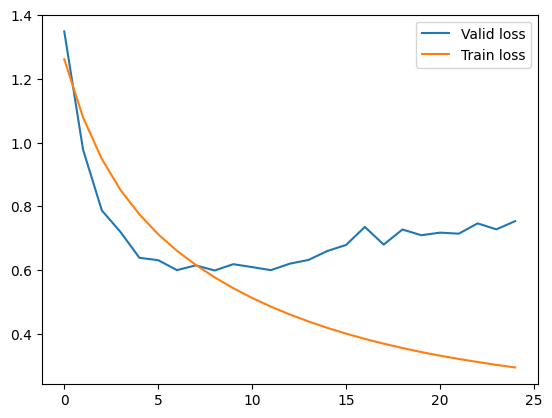

In [ ]:
model.plot_loss()

As shown in the plot, after the 10th epoch, the loss of validation started trending to increase. And the loss difference between train and validation becomes more evident as the number of epochs increases.So I tried to modify the number of epochs and batch size as follows.

In [ ]:
model1 = LanguageIdentifier(traing,2,32,512)
model1.train(traing,validg,10,128)

[train]  mean loss = 1.265137, mean acc = 0.626301
[valid]  mean loss = 1.456677, mean acc = 0.543019
[train]  mean loss = 1.100941, mean acc = 0.681554
[valid]  mean loss = 1.006156, mean acc = 0.685214
[train]  mean loss = 0.973858, mean acc = 0.717769
[valid]  mean loss = 0.837712, mean acc = 0.750644
[train]  mean loss = 0.878144, mean acc = 0.744255
[valid]  mean loss = 0.732895, mean acc = 0.778980
[train]  mean loss = 0.801369, mean acc = 0.764866
[valid]  mean loss = 0.683674, mean acc = 0.786193
[train]  mean loss = 0.738866, mean acc = 0.782313
[valid]  mean loss = 0.657300, mean acc = 0.804225
[train]  mean loss = 0.686205, mean acc = 0.797262
[valid]  mean loss = 0.628480, mean acc = 0.795981
[train]  mean loss = 0.641374, mean acc = 0.809953
[valid]  mean loss = 0.658718, mean acc = 0.794951
[train]  mean loss = 0.601998, mean acc = 0.821165
[valid]  mean loss = 0.643692, mean acc = 0.801649
[train]  mean loss = 0.566781, mean acc = 0.831306
[valid]  mean loss = 0.653507, 

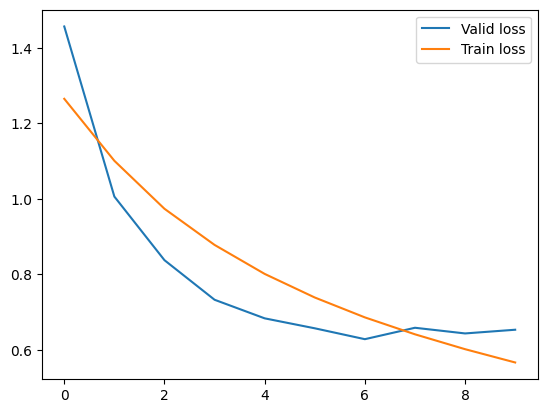

In [ ]:
model1.plot_loss()

In [ ]:
model2 = LanguageIdentifier(traing,2,32,512)
model2.train(traing,validg,10,64)

[train]  mean loss = 1.106299, mean acc = 0.678952
[valid]  mean loss = 1.396275, mean acc = 0.566203
[train]  mean loss = 0.924804, mean acc = 0.730024
[valid]  mean loss = 0.969453, mean acc = 0.674910
[train]  mean loss = 0.805468, mean acc = 0.762925
[valid]  mean loss = 0.815992, mean acc = 0.749098
[train]  mean loss = 0.719466, mean acc = 0.786453
[valid]  mean loss = 0.699569, mean acc = 0.783617
[train]  mean loss = 0.652169, mean acc = 0.805612
[valid]  mean loss = 0.702250, mean acc = 0.778465
[train]  mean loss = 0.597433, mean acc = 0.821069
[valid]  mean loss = 0.706457, mean acc = 0.780526
[train]  mean loss = 0.552340, mean acc = 0.833914
[valid]  mean loss = 0.662754, mean acc = 0.792890
[train]  mean loss = 0.513315, mean acc = 0.845097
[valid]  mean loss = 0.688600, mean acc = 0.785677
[train]  mean loss = 0.479968, mean acc = 0.854800
[valid]  mean loss = 0.720739, mean acc = 0.781041
[train]  mean loss = 0.450813, mean acc = 0.863188
[valid]  mean loss = 0.747778, 

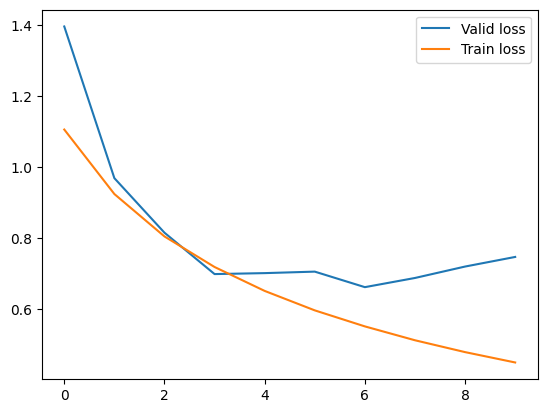

In [ ]:
model2.plot_loss()

In [ ]:
model3 = LanguageIdentifier(traing,2,32,512)
model3.train(traing,validg,25,256)

[train]  mean loss = 1.386100, mean acc = 0.592294
[valid]  mean loss = 1.420626, mean acc = 0.554353
[train]  mean loss = 1.236188, mean acc = 0.641601
[valid]  mean loss = 1.046133, mean acc = 0.675425
[train]  mean loss = 1.111007, mean acc = 0.677300
[valid]  mean loss = 0.914812, mean acc = 0.713550
[train]  mean loss = 1.012805, mean acc = 0.705247
[valid]  mean loss = 0.836839, mean acc = 0.740855
[train]  mean loss = 0.933395, mean acc = 0.726945
[valid]  mean loss = 0.765292, mean acc = 0.765070
[train]  mean loss = 0.867168, mean acc = 0.745365
[valid]  mean loss = 0.693714, mean acc = 0.784132
[train]  mean loss = 0.810760, mean acc = 0.761238
[valid]  mean loss = 0.701812, mean acc = 0.777434
[train]  mean loss = 0.762817, mean acc = 0.774521
[valid]  mean loss = 0.645196, mean acc = 0.792890
[train]  mean loss = 0.720115, mean acc = 0.786753
[valid]  mean loss = 0.644455, mean acc = 0.790829
[train]  mean loss = 0.682485, mean acc = 0.797578
[valid]  mean loss = 0.640806, 

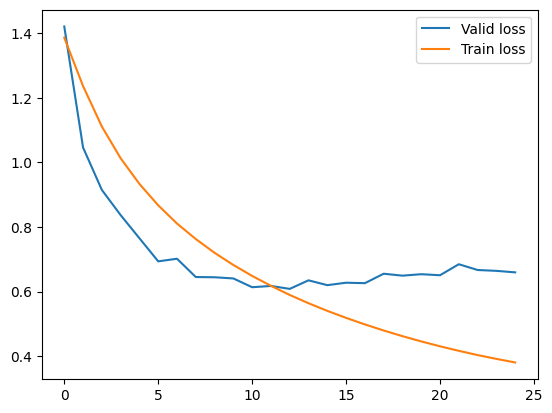

In [ ]:
model3.plot_loss()

Between these models, i will choose model1 for the prediction:

In [ ]:
model1.predict(traing,128,device='cpu')

['Ba', 'Ba', 'Jo', 'Ii', 'Lu', 'Oh', 'Gu', 'Ha', 'Ku', 'Li', 'Ba', 'Ly', 'Ta', 'Mo', 'Ri', 'Le', 'To', 'Ui', 'Vo', 'Ba', 'Ko', 'So', 'Ba', 'Ba', 'Ma', 'Yu', 'Vo', 'An', 'Ki', 'Re', 'Ma', 'Ra', 'Ba', 'Si', 'Yi', 'Ba', 'Do', 'Jo', 'Ba', 'Ba', 'Zhu', 'Yap', 'Baz', 'Ibi', 'Ngo', 'Chu', 'Fei', 'Vuu', 'Isa', 'Yin', 'Van', 'Tse', 'Cen', 'Uno', 'Shu', 'Yoo', 'Hao', 'Tai', 'Pei', 'Luc', 'Her', 'Fox', 'Nam', 'Koo', 'Ryu', 'Egr', 'Siu', 'Ban', 'Zhi', 'Isa', 'Lao', 'Chu', 'Mas', 'Dai', 'Gul', 'Wan', 'Kui', 'Hon', 'Lis', 'Isa', 'Cao', 'Tze', 'Mah', 'Dao', 'Bah', 'Tso', 'Baz', 'Lam', 'Wan', 'Cho', 'Bai', 'Isa', 'Juk', 'Baz', 'Mar', 'Zee', 'She', 'Qiu', 'Hay', 'Law', 'Woo', 'Gai', 'Ots', 'Uss', 'Dou', 'Doi', 'Gil', 'Sum', 'Koo', 'Hiu', 'Ino', 'Baz', 'Kim', 'Seo', 'Mui', 'Eng', 'Eto', 'Dan', 'Gro', 'Ott', 'Ott', 'Rim', 'Chi', 'Hui', 'Eig', 'Rey', 'Los', 'Joe', 'Baz', 'Pae', 'Dan', 'Mak', 'Hot', 'Xie', 'Bui', 'Bao', 'Sai', 'Ozu', 'Ise', 'Lim', 'Ron', 'Jin', 'Won', 'Jez', 'Chu', 'Sui', 'Xue', 'Vil', 'Xi

In [ ]:
with open("predictions.txt","r", encoding="utf-8") as f:
    for i in range(10):
        print(f.readline())

name:  Ba  prediction: Arabic  label: Arabic

name:  Ba  prediction: Arabic  label: Arabic

name:  Jo  prediction: Korean  label: Japanese

name:  Ii  prediction: Japanese  label: Japanese

name:  Lu  prediction: Chinese  label: Chinese

name:  Oh  prediction: Korean  label: Korean

name:  Gu  prediction: Chinese  label: Korean

name:  Ha  prediction: Arabic  label: Vietnamese

name:  Ku  prediction: Chinese  label: Korean

name:  Li  prediction: Chinese  label: Russian

